# College and Pub Distribution in Bratislava and Wien


This notebook is a  Capstone Project for IBM’s Applied Data Science Professional Certificate offered by Coursera. 
This is part of the final course in this 9-course series, week 5 assignment.

In [2]:
#!pip install html5lib

<br>
<br>

In [307]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from pandas import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Using geopy library to get the latitude and longitude values of Bratislava and Wien.
In order to define an instance of the geocoder, need to define user_agents as well. 

In [308]:
address1 = 'Bratislava, SK'
address2 = 'Wien, AT'

geolocator1 = Nominatim(user_agent="to_explorer")

location1 = geolocator1.geocode(address1)
ba_latitude = location1.latitude
ba_longitude = location1.longitude

geolocator2 = Nominatim(user_agent="to_explorer2")
location2 = geolocator2.geocode(address2)
wi_latitude = location2.latitude
wi_longitude = location2.longitude


print('The geographical coordinate of Bratislava are {}, {}.'.format(ba_latitude, ba_longitude))
print('The geographical coordinate of Wien are {}, {}.'.format(wi_latitude, wi_longitude))

The geographical coordinate of Bratislava are 48.1516988, 17.1093063.
The geographical coordinate of Wien are 48.2083537, 16.3725042.


Creating a map depicting where Bratislava and Wien are situated.

In [309]:

map_BW = folium.Map(location=[ba_latitude, ba_longitude], zoom_start=9)

label1 = 'Bratislava'
label1 = folium.Popup(label1, parse_html=True)
folium.CircleMarker(
        [ba_latitude, ba_longitude],
        radius=5,
        popup=label1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BW)  

label2 = 'Wien'
label1 = folium.Popup(label2, parse_html=True)
folium.CircleMarker(
        [wi_latitude, wi_longitude],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BW) 

map_BW

Next step is todefine Foursquare Credentials and Version to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [310]:
CLIENT_ID = 'RJXTHMSROMQF2QEKDPR5RDBGI1FCGFPE1FESK2FSIOBEX14B' 
CLIENT_SECRET = '1ZMU21OOTZO14JGETTI2SIL1NCOJ5NDW0OPIXFG5BOWVJAOC' 
VERSION = '20180605' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RJXTHMSROMQF2QEKDPR5RDBGI1FCGFPE1FESK2FSIOBEX14B
CLIENT_SECRET:1ZMU21OOTZO14JGETTI2SIL1NCOJ5NDW0OPIXFG5BOWVJAOC


Getting the University and Pub venues located in Bratsilava within a radius of 10 000 meters.
Getting the University and Pub venues located in Wien within a radius of 2 000 meters.
Creating the GET request URL:

In [311]:

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius_ba = 10000 # define radius
radius_wi = 2000 # define radius
query_univ = 'university'
query_pub = 'pub'

url_ba_univ = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ba_latitude, 
    ba_longitude, 
    query_univ,
    radius_ba, 
    LIMIT)


url_ba_pub = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ba_latitude, 
    ba_longitude, 
    query_pub,
    radius_ba, 
    LIMIT)


url_wi_univ = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    wi_latitude, 
    wi_longitude, 
    query_univ,
    radius_wi, 
    LIMIT)


url_wi_pub = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    wi_latitude, 
    wi_longitude, 
    query_pub,
    radius_wi, 
    LIMIT)

# display URL
#url_ba_univ 
#url_ba_pub
#url_wi_univ
url_wi_pub

'https://api.foursquare.com/v2/venues/explore?&client_id=RJXTHMSROMQF2QEKDPR5RDBGI1FCGFPE1FESK2FSIOBEX14B&client_secret=1ZMU21OOTZO14JGETTI2SIL1NCOJ5NDW0OPIXFG5BOWVJAOC&v=20180605&ll=48.2083537,16.3725042&query=pub&radius=2000&limit=100'

Sending GET request and examining the resutls:

In [313]:
results_ba_univ = requests.get(url_ba_univ).json()
results_ba_pub = requests.get(url_ba_pub).json()
results_wi_univ = requests.get(url_wi_univ).json()
results_wi_pub = requests.get(url_wi_pub).json()
results_ba_univ

{'meta': {'code': 200, 'requestId': '608bd29b0f82c457f9358078'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bratislava',
  'headerFullLocation': 'Bratislava',
  'headerLocationGranularity': 'city',
  'query': 'university',
  'totalResults': 32,
  'suggestedBounds': {'ne': {'lat': 48.24169889000009,
    'lng': 17.243954597065784},
   'sw': {'lat': 48.06169870999991, 'lng': 16.974658002934216}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f435a62e4b011b007665053',
       'name': 'Slovak University Of Technology',
       'location': {'address': 'Vazovova 5',
        'lat': 48.15075714251311,
        'lng': 17.114381288741008,
        'labeledLatLngs': [{'label': 'display',
 

All the information is in the items key. To clean the json and structure it into a pandas dataframe, the following get_category_type function for extracting the category of the venue will be used:

In [314]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [315]:
venues_ba_univ = results_ba_univ['response']['groups'][0]['items'] 
ba_univ = json_normalize(venues_ba_univ) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
ba_univ =ba_univ.loc[:, filtered_columns]

# filter the category for each row
ba_univ['venue.categories'] = ba_univ.apply(get_category_type, axis=1)

# clean columns
ba_univ.columns = [col.split(".")[-1] for col in ba_univ.columns]



venues_ba_pub = results_ba_pub['response']['groups'][0]['items'] 
ba_pub = json_normalize(venues_ba_pub) 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
ba_pub =ba_pub.loc[:, filtered_columns]
ba_pub['venue.categories'] = ba_pub.apply(get_category_type, axis=1)
ba_pub.columns = [col.split(".")[-1] for col in ba_pub.columns]


venues_wi_univ = results_wi_univ['response']['groups'][0]['items'] 
wi_univ = json_normalize(venues_wi_univ) 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
wi_univ = wi_univ.loc[:, filtered_columns]
wi_univ['venue.categories'] = wi_univ.apply(get_category_type, axis=1)
wi_univ.columns = [col.split(".")[-1] for col in wi_univ.columns]


venues_wi_pub = results_wi_pub['response']['groups'][0]['items'] 
wi_pub = json_normalize(venues_wi_pub) 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
wi_pub = wi_pub.loc[:, filtered_columns]
wi_pub['venue.categories'] = wi_pub.apply(get_category_type, axis=1)
wi_pub.columns = [col.split(".")[-1] for col in wi_pub.columns]


ba_univ
#ba_pub
#wi_univ
#wi_pub


,name,categories,lat,lng
0,Slovak University Of Technology,University,48.150757,17.114381
1,Akademia Medii,University,48.145248,17.105958
2,"Trnavska Univerzita, Teologicka fakulta",University,48.144232,17.109530
3,Katedra marketingovej komunikácie FF UK,University,48.142840,17.113962
4,Univerzita Komenského,University,48.141077,17.115771
5,SZU Slovenska Zdravotnicka Univerzita,University,48.167722,17.087262
6,VŠVU,University,48.155338,17.085886
7,"Ústav technológií a materiálov, Strojnícka Fak...",University,48.168500,17.126359
8,Slovenska Technická Univerzita,University,48.151859,17.073326
9,Fakulta informatiky a informačných technológií...,University,48.153721,17.071860


In [316]:

print('{} university venues in Bratislava were returned by Foursquare.'.format(ba_univ.shape[0]))
print('{} pub venues in Bratislava were returned by Foursquare.'.format(ba_pub.shape[0]))
print('{} university venues in Wien were returned by Foursquare.'.format(wi_univ.shape[0]))
print('{} pub venues in Wien were returned by Foursquare.'.format(wi_pub.shape[0]))

32 university venues in Bratislava were returned by Foursquare.
100 pub venues in Bratislava were returned by Foursquare.
68 university venues in Wien were returned by Foursquare.
73 pub venues in Wien were returned by Foursquare.


Mapping result sets:

In [317]:
# create map
map_venues = folium.Map(location=[latitude, longitude], zoom_start=9)

# add green markers for universities in Bratislava
for lat, lon, name in zip(ba_univ['lat'], ba_univ['lng'], ba_univ['name']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_venues)
    
# add yellow markers for pubs in Bratislava
for lat, lon, name in zip(ba_pub['lat'], ba_pub['lng'], ba_pub['name']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(map_venues)
    
# add black markers for universities in Wien 
for lat, lon, name in zip(wi_univ['lat'], wi_univ['lng'], wi_univ['name']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_venues)
    
# add red markers for pubs in Wien
for lat, lon, name in zip(wi_pub['lat'], wi_pub['lng'], wi_pub['name']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_venues)    
    
    

map_venues



In [318]:
import math
from geopy.distance import geodesic 

Adding fictive keys in order to create Cartesian product of the university and pub datasets. 
It will be used for computing all the corresponding distances.

In [319]:
ba_univ = ba_univ.assign(JKEY=42)
ba_univ
ba_pub = ba_pub.assign(JKEY=42)
ba_pub
ba_combined = ba_univ.merge(ba_pub, on='JKEY', suffixes=('', '_pub'))
ba_combined.head()

,name,categories,lat,lng,JKEY,name_pub,categories_pub,lat_pub,lng_pub
0,Slovak University Of Technology,University,48.150757,17.114381,42,Čierny pes,Pub,48.144217,17.104566
1,Slovak University Of Technology,University,48.150757,17.114381,42,Stupavar Beer Pub,Pub,48.143212,17.106181
2,Slovak University Of Technology,University,48.150757,17.114381,42,Drink in Gallery Andy,Pub,48.142170,17.103924
3,Slovak University Of Technology,University,48.150757,17.114381,42,Uisce Beatha,Pub,48.144380,17.104952
4,Slovak University Of Technology,University,48.150757,17.114381,42,Staromeštianska pivotéka,Pub,48.150012,17.106090


Ckecking the output size:

In [320]:
ba_combined.shape

(3200, 9)

Ckecking column data type:

In [321]:
ba_combined.loc[1].lat_pub.dtype

dtype('float64')

Computing the distances:

In [322]:
ba_combined['distance'] = ba_combined.apply(
    (lambda row: geodesic(
        (row['lat_pub'], row['lng_pub']),
        (row['lat'], row['lng'])
    ).kilometers),
    axis=1
)

In [323]:
ba_combined.head()

,name,categories,lat,lng,JKEY,name_pub,categories_pub,lat_pub,lng_pub,distance
0,Slovak University Of Technology,University,48.150757,17.114381,42,Čierny pes,Pub,48.144217,17.104566,1.030719
1,Slovak University Of Technology,University,48.150757,17.114381,42,Stupavar Beer Pub,Pub,48.143212,17.106181,1.037404
2,Slovak University Of Technology,University,48.150757,17.114381,42,Drink in Gallery Andy,Pub,48.142170,17.103924,1.231766
3,Slovak University Of Technology,University,48.150757,17.114381,42,Uisce Beatha,Pub,48.144380,17.104952,0.997605
4,Slovak University Of Technology,University,48.150757,17.114381,42,Staromeštianska pivotéka,Pub,48.150012,17.106090,0.622496


Doing some checks:

In [324]:
ba_combined.loc[ba_combined['name'].str.contains('Medii')]

,name,categories,lat,lng,JKEY,name_pub,categories_pub,lat_pub,lng_pub,distance
100,Akademia Medii,University,48.145248,17.105958,42,Čierny pes,Pub,48.144217,17.104566,0.154529
101,Akademia Medii,University,48.145248,17.105958,42,Stupavar Beer Pub,Pub,48.143212,17.106181,0.226924
102,Akademia Medii,University,48.145248,17.105958,42,Drink in Gallery Andy,Pub,48.142170,17.103924,0.374208
103,Akademia Medii,University,48.145248,17.105958,42,Uisce Beatha,Pub,48.144380,17.104952,0.122166
104,Akademia Medii,University,48.145248,17.105958,42,Staromeštianska pivotéka,Pub,48.150012,17.106090,0.529903
105,Akademia Medii,University,48.145248,17.105958,42,Bratislavský meštiansky pivovar,Pub,48.147120,17.108253,0.269314
106,Akademia Medii,University,48.145248,17.105958,42,Bermudsky trojuholnik,Pub,48.142188,17.103937,0.371931
107,Akademia Medii,University,48.145248,17.105958,42,Na šanci,Pub,48.156562,17.114221,1.400239
108,Akademia Medii,University,48.145248,17.105958,42,Fortuna,Pub,48.124906,17.129824,2.875961
109,Akademia Medii,University,48.145248,17.105958,42,Club Koliesko,Pub,48.159297,17.119242,1.848598


Creating the dataset for mean distances from the universities in Bratislava

In [325]:
ba_grouped_mean = ba_combined.groupby('name').mean().reset_index()[['name', 'distance']]
ba_grouped_mean.rename(columns={'distance':'distance_mean'}, inplace=True)
ba_grouped_mean.describe()

,distance_mean
count,32.000000
mean,3.007312
std,1.805974
min,1.291531
25%,1.526965
50%,2.891927
75%,3.342536
max,9.432005


In [233]:
ba_grouped_min = ba_combined.groupby('name').min().reset_index()[['name', 'distance']]
ba_grouped_min.rename(columns={'distance':'distance_min'}, inplace=True)
#ba_grouped_min = ba_grouped_min.drop('JKEY', 1)
ba_grouped_min.describe()

,distance_min
count,32.000000
mean,0.667835
std,1.081422
min,0.037782
25%,0.132482
50%,0.286675
75%,0.585352
max,5.606266


Creating the dataset for maximum distances from the universities in Bratislava

In [326]:
ba_grouped_max = ba_combined.groupby('name').max().reset_index()[['name', 'distance']]
ba_grouped_max.rename(columns={'distance':'distance_max'}, inplace=True)
#ba_grouped_min = ba_grouped_min.drop('JKEY', 1)
ba_grouped_max.describe()

,distance_max
count,32.000000
mean,9.020811
std,1.846582
min,6.720079
25%,7.810273
50%,8.384824
75%,10.094777
max,14.440553


Repeating the same process for Wien.

In [327]:
wi_univ = wi_univ.assign(JKEY=42)
wi_univ
wi_pub = wi_pub.assign(JKEY=42)
wi_pub
wi_combined = wi_univ.merge(wi_pub, on='JKEY', suffixes=('', '_pub'))
wi_combined.head()

,name,categories,lat,lng,JKEY,name_pub,categories_pub,lat_pub,lng_pub
0,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,1516 The Brewing Company,Pub,48.203469,16.373193
1,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Kolar,Pub,48.210538,16.370033
2,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Irish Pub Bockshorn,Pub,48.209845,16.367692
3,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Crossfield's Australian Pub,Pub,48.204330,16.369244
4,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Cafe Brendl,Pub,48.216046,16.378162


In [328]:
wi_combined.shape

(4964, 9)

In [329]:
wi_combined.loc[1].lat_pub.dtype

dtype('float64')

In [330]:
wi_combined['distance'] = wi_combined.apply(
    (lambda row: geodesic(
        (row['lat_pub'], row['lng_pub']),
        (row['lat'], row['lng'])
    ).kilometers),
    axis=1
)

In [331]:
wi_combined.head()

,name,categories,lat,lng,JKEY,name_pub,categories_pub,lat_pub,lng_pub,distance
0,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,1516 The Brewing Company,Pub,48.203469,16.373193,0.703311
1,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Kolar,Pub,48.210538,16.370033,0.379898
2,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Irish Pub Bockshorn,Pub,48.209845,16.367692,0.219960
3,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Crossfield's Australian Pub,Pub,48.204330,16.369244,0.453504
4,"Institut für Theater-, Film- und Medienwissens...",University,48.208006,16.366601,42,Cafe Brendl,Pub,48.216046,16.378162,1.239943


In [332]:
wi_grouped_mean = wi_combined.groupby('name').mean().reset_index()[['name', 'distance']]
wi_grouped_mean.rename(columns={'distance':'distance_mean'}, inplace=True)
wi_grouped_mean.describe()

,distance_mean
count,68.000000
mean,1.442595
std,0.256458
min,0.979183
25%,1.245036
50%,1.402511
75%,1.635077
max,2.056437


In [333]:
wi_grouped_min = wi_combined.groupby('name').min().reset_index()[['name', 'distance']]
wi_grouped_min.rename(columns={'distance':'distance_min'}, inplace=True)
wi_grouped_min.describe()

,distance_min
count,68.000000
mean,0.243200
std,0.144066
min,0.051427
25%,0.146711
50%,0.181159
75%,0.344653
max,0.641516


In [334]:
wi_grouped_max = wi_combined.groupby('name').max().reset_index()[['name', 'distance']]
wi_grouped_max.rename(columns={'distance':'distance_max'}, inplace=True)
wi_grouped_max.describe()

,distance_max
count,68.000000
mean,2.951847
std,0.468488
min,2.092621
25%,2.576081
50%,2.896431
75%,3.192954
max,3.820862


In [335]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Creating the graphs, visualising the result sets:

In [336]:
#ba_univ
#ba_pub
#ba_combined
#wi_combined
#ba_grouped_mean
#ba_grouped_max
#ba_grouped_min

<br>
<br>
<br>
Plotting Bratislava (mean distances, max distances, min distances)

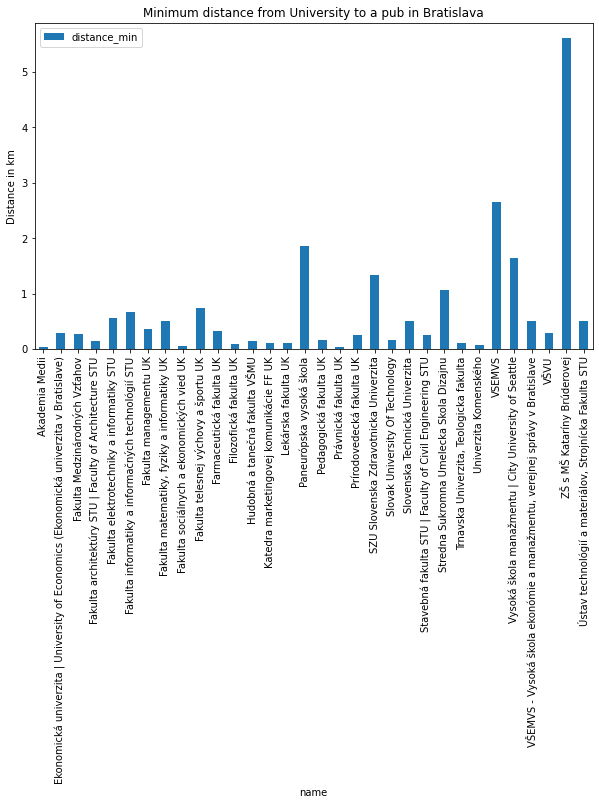

In [337]:
ba_grouped_min.plot(kind='bar', x='name', y='distance_min', figsize=(10, 6))

plt.xlabel('name') 
plt.ylabel('Distance in km')
plt.title('Minimum distance from University to a pub in Bratislava') 

plt.show()

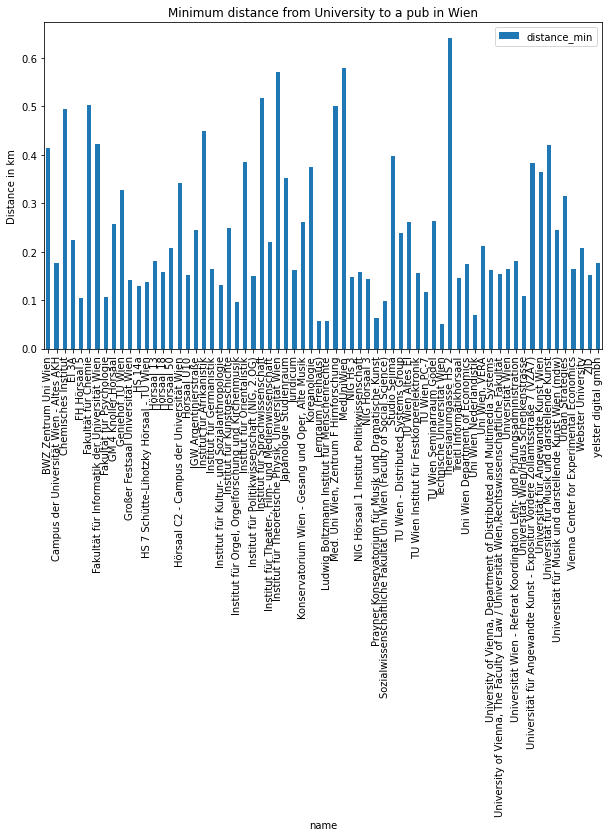

In [338]:
wi_grouped_min.plot(kind='bar', x='name', y='distance_min', figsize=(10, 6))

plt.xlabel('name') 
plt.ylabel('Distance in km')
plt.title('Minimum distance from University to a pub in Wien') 

plt.show()

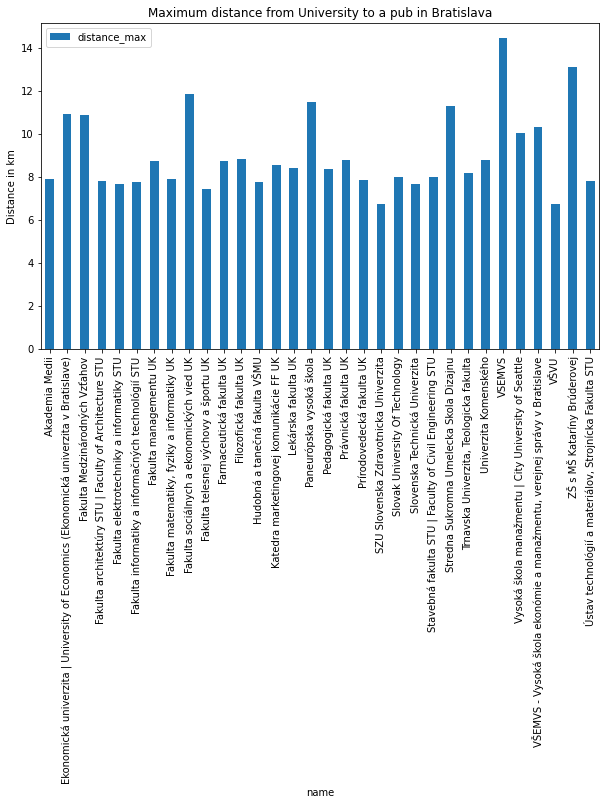

In [339]:
ba_grouped_max.plot(kind='bar', x='name', y='distance_max', figsize=(10, 6))

plt.xlabel('name') 
plt.ylabel('Distance in km')
plt.title('Maximum distance from University to a pub in Bratislava') 

plt.show()

<br>
<br>
<br>
Plotting Wien (mean distances, max distances, min distances)

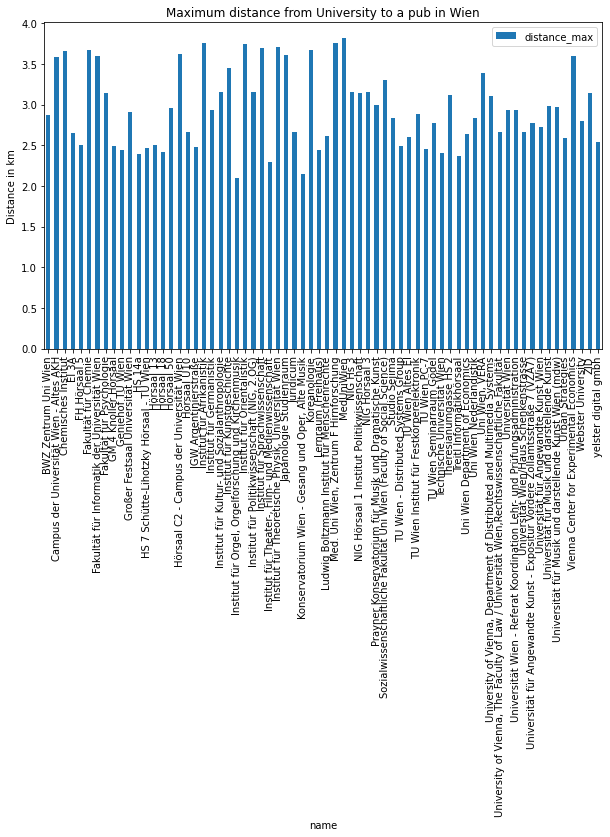

In [340]:
wi_grouped_max.plot(kind='bar', x='name', y='distance_max', figsize=(10, 6))

plt.xlabel('name') 
plt.ylabel('Distance in km')
plt.title('Maximum distance from University to a pub in Wien') 

plt.show()

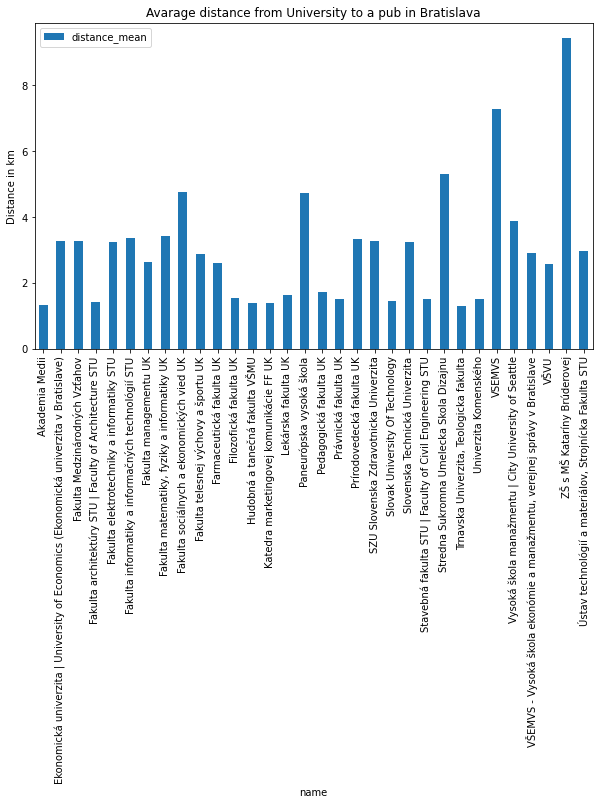

In [341]:
ba_grouped_mean.plot(kind='bar', x='name', y='distance_mean', figsize=(10, 6))

plt.xlabel('name') 
plt.ylabel('Distance in km')
plt.title('Avarage distance from University to a pub in Bratislava') 

plt.show()

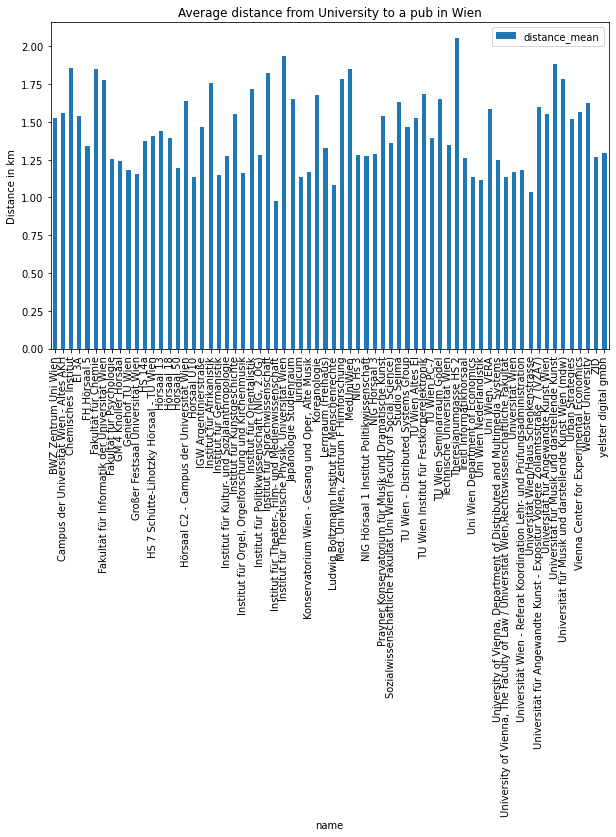

In [342]:
wi_grouped_mean.plot(kind='bar', x='name', y='distance_mean', figsize=(10, 6))

plt.xlabel('name') 
plt.ylabel('Distance in km')
plt.title('Average distance from University to a pub in Wien') 

plt.show()

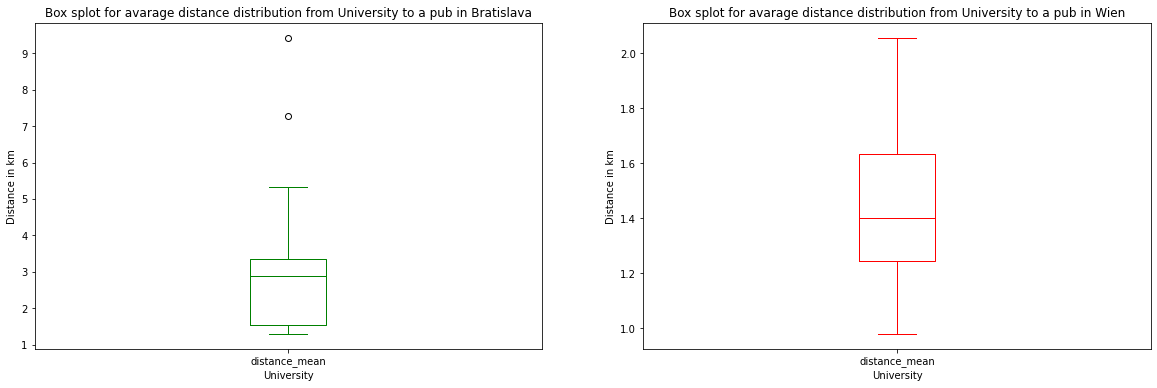

In [289]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ba_grouped_mean.plot(kind='box', color='green', vert=True, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box splot for avarage distance distribution from University to a pub in Bratislava')
ax0.set_ylabel('Distance in km')
ax0.set_xlabel('University')

# Subplot 2: Line plot
wi_grouped_mean.plot(kind='box', color = 'red', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Box splot for avarage distance distribution from University to a pub in Wien')
ax1.set_ylabel('Distance in km')
ax1.set_xlabel('University')

plt.show()

<br>
<br>
<br>
Creating Box plots for comparing statistical distribution of learned min, max and mean distances in Bratislava and Wien

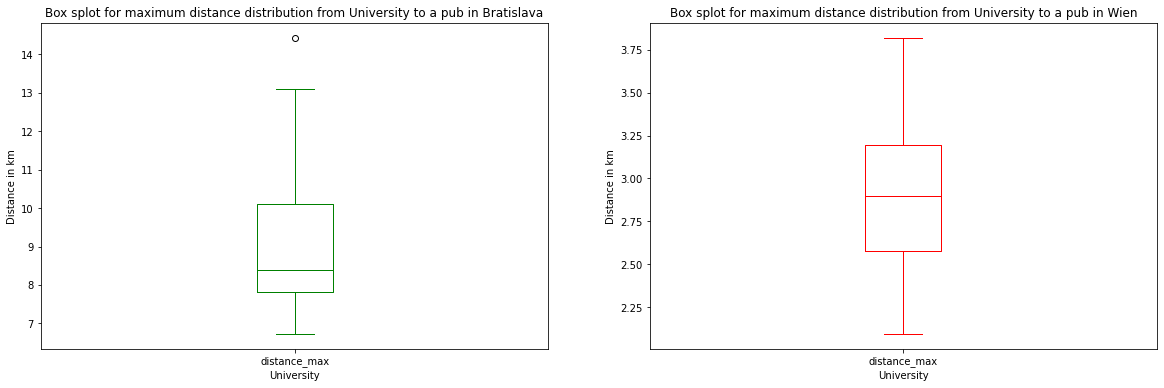

In [288]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ba_grouped_max.plot(kind='box', color='green', vert=True, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box splot for maximum distance distribution from University to a pub in Bratislava')
ax0.set_ylabel('Distance in km')
ax0.set_xlabel('University')

# Subplot 2: Line plot
wi_grouped_max.plot(kind='box', color = 'red', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Box splot for maximum distance distribution from University to a pub in Wien')
ax1.set_ylabel('Distance in km')
ax1.set_xlabel('University')

plt.show()

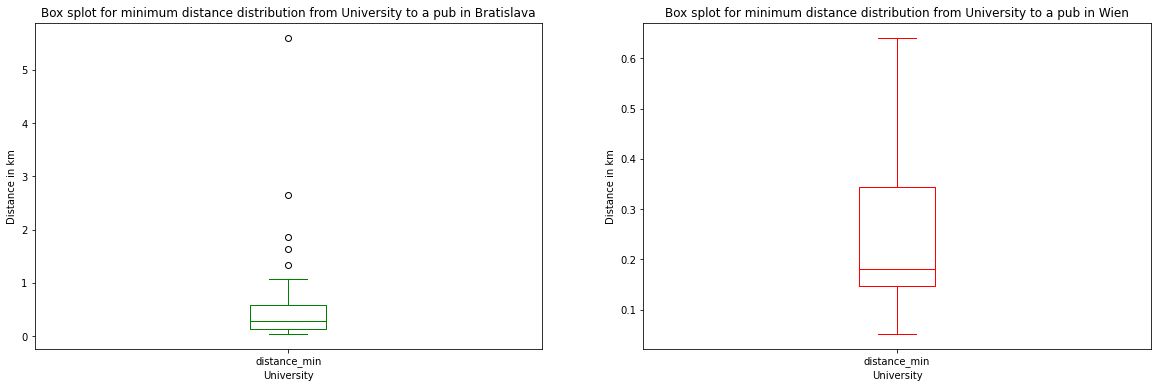

In [290]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ba_grouped_min.plot(kind='box', color='green', vert=True, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box splot for minimum distance distribution from University to a pub in Bratislava')
ax0.set_ylabel('Distance in km')
ax0.set_xlabel('University')

# Subplot 2: Line plot
wi_grouped_min.plot(kind='box', color = 'red', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Box splot for minimum distance distribution from University to a pub in Wien')
ax1.set_ylabel('Distance in km')
ax1.set_xlabel('University')

plt.show()